In [1]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv

In [8]:
load_dotenv()
import os

In [9]:
GROQ_API_KEY=os.getenv("GROQ_API_KEY")

In [ ]:
model=ChatGroq(model="llama3-70b-8192",api_key=GROQ_API_KEY)

In [3]:
#create state

class LLMstate(TypedDict):
    question:str
    answer:str


In [4]:
def llm_qa(state:LLMstate)->LLMstate:
    #extract the question from state
    question=state['question']

    #form a prompt
    prompt=f"answer the following question {question}"
    #ask the question to llm
    answer=model.invoke(prompt).content
    #update the answer in state
    state['answer']=answer

    return state



In [5]:
#create a graph
graph=StateGraph(LLMstate)

#create a node
graph.add_node("LLM_QA",llm_qa)

#add edges
graph.add_edge(START,'LLM_QA')
graph.add_edge('LLM_QA',END)

#compile the graph

workflow=graph.compile()

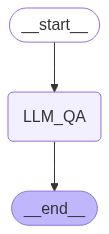

In [ ]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
initial_state={"question":"what is the langgraph"}

final_out=workflow.invoke(initial_state)

print(final_out['answer'])

LangGraph is a fascinating concept!

LangGraph is a type of graph data structure specifically designed to represent and process natural language data. It's a powerful tool for natural language processing (NLP) and information retrieval.

In a LangGraph, nodes represent words, phrases, or entities, and edges connect these nodes based on their semantic relationships, such as synonymy, hyponymy, hypernymy, and other linguistic connections. This graph structure allows for efficient querying, traversal, and analysis of language data.

LangGraphs can be used in various applications, including:

1. **Word sense induction**: to identify and disambiguate word senses
2. **Semantic search**: to improve search engine results by understanding the semantic context of queries
3. **Text summarization**: to extract key concepts and relationships from large documents
4. **Question answering**: to identify answers to questions based on semantic relationships in the LangGraph
5. **Language modeling**: to 